# **ZOMATO Banglore Dataset**

In [4]:
#IMPORTING libraries

import numpy as np              #for numerical calculations
import pandas as pd             #data manipulating,data cleaning and to access a particular data
import seaborn as sns           # for visualiuzation
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Loading and reading the dataset
zomato_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv/zomato.csv")

In [7]:
zomato_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Columns description

* **url:-** contains the url of the restaurant in the zomato website

* **address:-** contains the address of the restaurant in Bengaluru

* **name:-** contains the name of the restaurant

* **online_order:-** whether online ordering is available in the restaurant or not

* **book_table:-** table book option available or not

* **rate:-** contains the overall rating of the restaurant out of 5

* **votes:-** contains total number of rating for the restaurant as of the above mentioned date

* **phone:-** contains the phone number of the restaurant

* **location:-** contains the neighborhood in which the restaurant is located

* **rest_type:-** restaurant type

* **dish_liked:-** dishes people liked in the restaurant

* **cuisines:-** food styles, separated by comma

* **approx_cost(for two people):-** contains the approximate cost for meal for two people

* **reviews_list:-** list of tuples containing reviews for the restaurant, each tuple

* **menu_item:-** contains list of menus available in the restaurant

* **listed_in(type):-** type of meal

* **listed_in(city):-** contains the neighborhood in which the restaurant is listed

In [8]:
#Looking at the information about the dataset,datatypes of the corresponding columns and missing values
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
#Deleting unnecessary columns
#Dropping the column 'dish_liked','phone','url' and saving the new dataset as 'zomato'.
zomato=zomato_data.drop(['url','dish_liked','phone'],axis=1)

In [10]:
#Removing the duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [11]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True) #Any method

In [12]:
#info() function is used to get a concise summary of the dataframe
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [13]:
#Reading Column Names
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [14]:
#Changing the column Names using rename function
#passing names using dictionary #assign new value to particular key
zomato=zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [15]:
#Some transformations
#changing the cost to string
zomato['cost']=zomato['cost'].astype(str)

#using lambda function to replace ',' from cost
zomato['cost']=zomato['cost'].apply(lambda x:x.replace(',','.'))

#changing the cost to float
zomato['cost']=zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [16]:
#Seeing unique ratings in rate column
#unique method
zomato['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
#Removing '/5' from rates as we know there ratings are given from 5.
#accessing only those which are not equal to 'NEW' and '-'
zomato=zomato.loc[zomato.rate!='NEW']
zomato=zomato.loc[zomato.rate!='-'].reset_index(drop=True)
remove_slash=lambda x:x.replace('/5','')if type(x)==np.str else x
zomato.rate=zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()



0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [18]:
#Adjust the column names
#order online and booked table 0 and 1.
zomato.name=zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True,False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True,False),inplace=True)
zomato.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [19]:
#Encode the input variables
#trying to factorize columns like rate,cost and votes into 0 and 1.
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate','cost','votes'])]:
        zomato[column]=zomato[column].factorize()[0]
    return zomato
zomato_en=Encode(zomato.copy())

In [20]:
zomato_en

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41232,3137,2699,1,1,3.7,34,25,28,204,800.0,4028,0,6,29
41233,8791,1716,1,1,2.5,81,25,28,761,800.0,21082,0,6,29
41234,8725,6532,1,1,3.6,27,25,17,240,1.5,20956,0,6,29
41235,8786,6568,1,0,4.3,236,56,17,237,2.5,21054,0,6,29


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

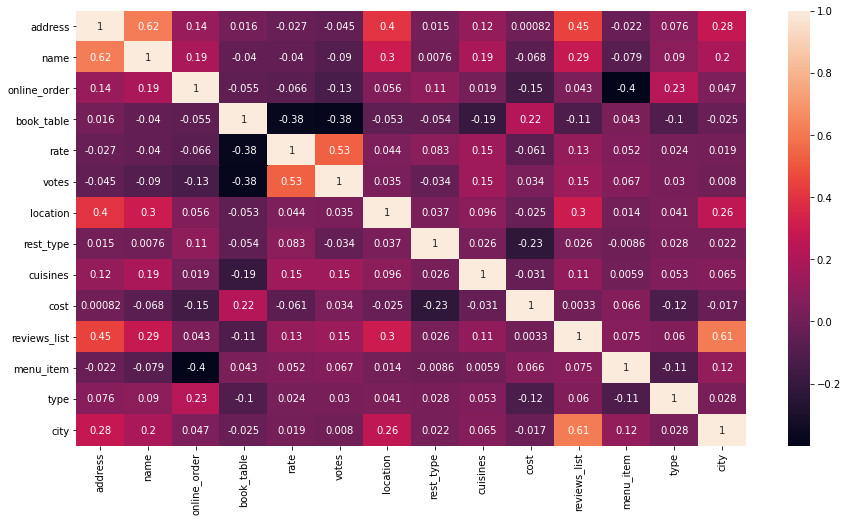

In [21]:
#Get correlation between different variables
#correlation matrix
#CORRELATION LIES between 0 and 1.Right side map 0 to 1.Higher the correlation,stronger the two variables are related to each other.
#diagonal ones are always 1 as they are correlated with each other.(Same)
#seeing color judge highly related or less related
corr=zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8)) #(x,y)
sns.heatmap(corr,annot=True)
zomato_en.columns

**The highest correlation is between name and address which is 0.66 which is not of very much concern.**

## **Data Visulaization**

* **1. Restaurants delivering online or Not**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurants delivering online or Not')

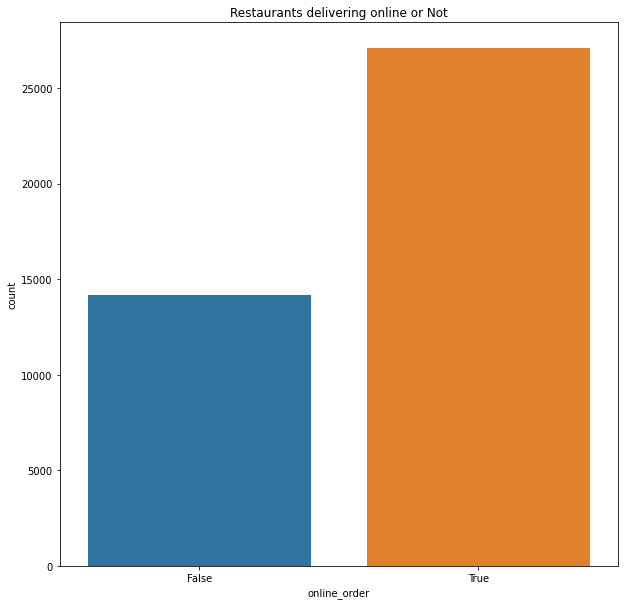

In [28]:
#Restaurants delivering online or not
#False-Not D True-Delivering
sns.countplot(zomato['online_order'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

* As clearly indicated,almost 60 per cent of restaurants in Banglore accepts online orders.
* Nearly 40 per cent of the restaurants do not accept online orders.

* **2. Restaurants allowing table booking or Not**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurants allowing table booking or Not')

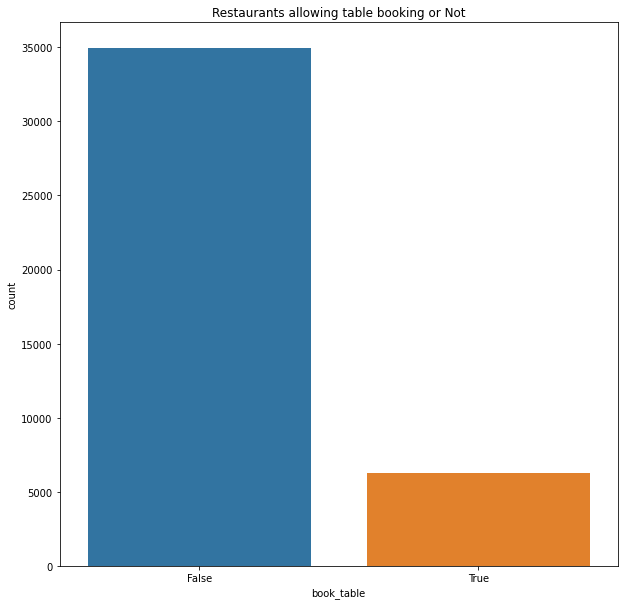

In [29]:
#Barplot
#Restaurants allowing table booking or Not
sns.countplot(zomato['book_table'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants allowing table booking or Not')

* Almost **90 percent of restaurants in Banglore do not provide table booking facility.**
* In India you cannot find table booking facility in any average restaurants,usually only five star restaurants provides table booking.

* **3. Location and Rating**

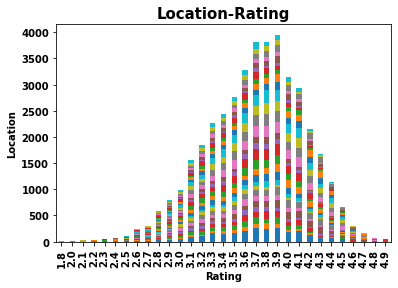

In [30]:
loc_plt=pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind='bar',stacked=True)
plt.title('Location-Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend().remove()

* Almost more than **50 percent of restaurants has rating between 3 and 4.**
* Restaurants having **rating more than 4.5 are very rare.**

* **4.Restaurant Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurant Type')

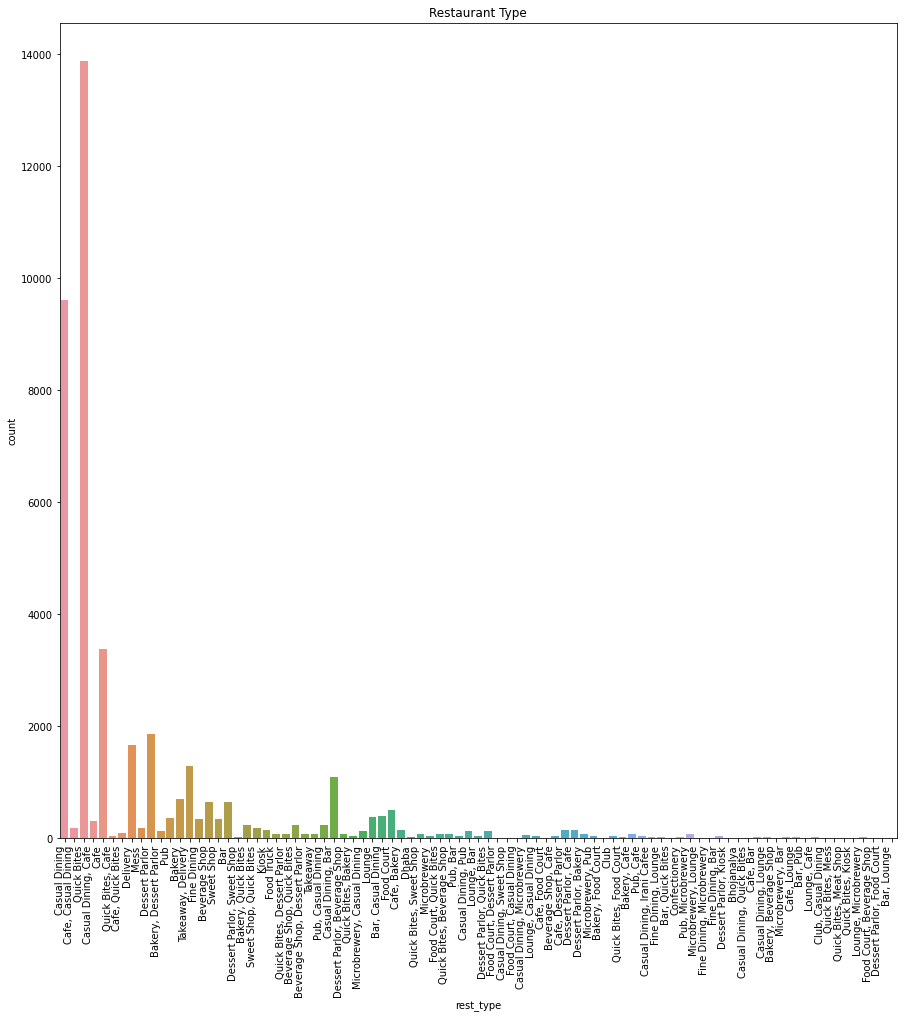

In [31]:
sns.countplot(zomato['rest_type'])
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(),rotation=90,ha="right")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restaurant Type')

* No doubt about this as Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.
* We can observe thaT **Quick Bites type restaurants dominates.**

* **5. Number of Restaurants in a Location**

Text(0.5, 1.0, 'Number of Restaurants in a Location')

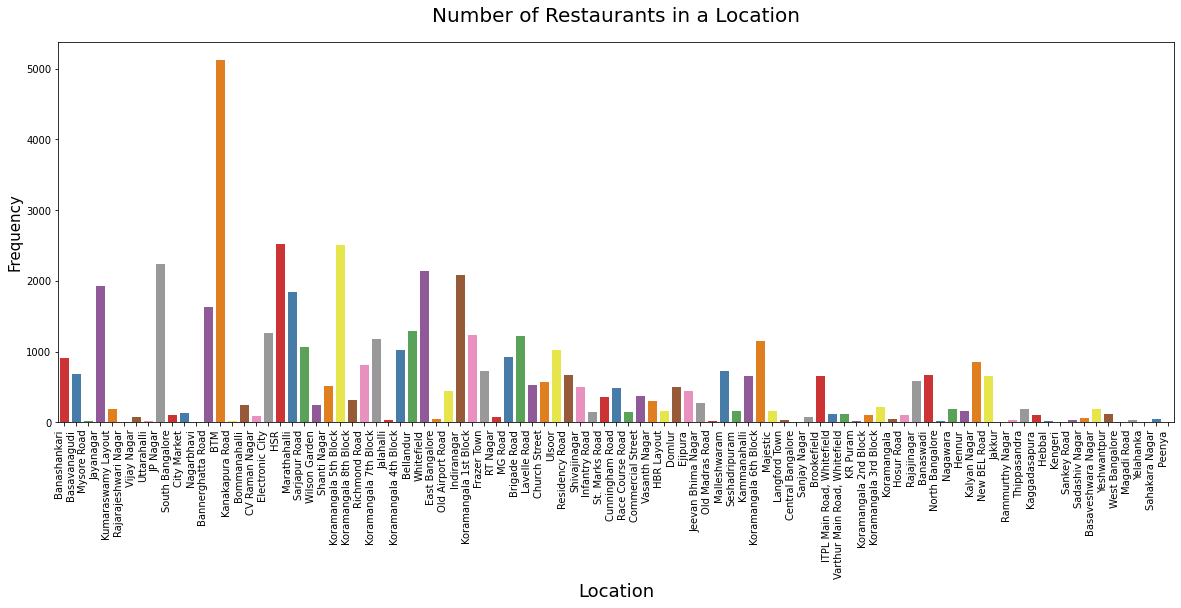

In [32]:
fig=plt.figure(figsize=(20,7))
loc=sns.countplot(x="location",data=zomato_data,palette='Set1')
loc.set_xticklabels(loc.get_xticklabels(),rotation=90,ha="right")
plt.ylabel('Frequency',size=15)
plt.xlabel('Location',size=18)
loc
plt.title('Number of Restaurants in a Location',size=20,pad=20)

*  We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.
* BTM dominates the section by having more than 5000 restaurants.

* **6.Most famous Restaurant Chains in Benagaluru**

Text(0.5, 0, 'Number of outlets')

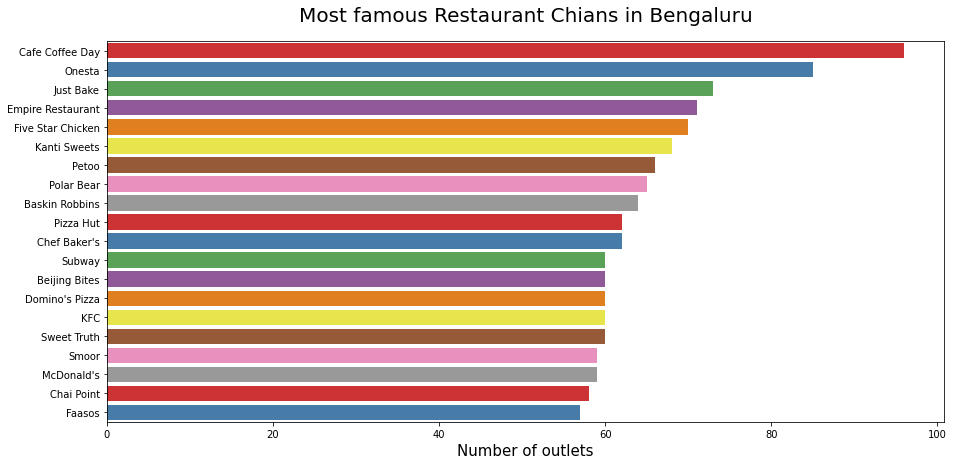

In [33]:
#Restaurant Names
#Outlets means branches
plt.figure(figsize=(15,7))
chains=zomato_data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title('Most famous Restaurant Chians in Bengaluru',size=20,pad=20)
plt.xlabel('Number of outlets',size=15)

* As you can see **Cafe coffee day,Onesta,Just Bake** has the most number of outlets in and around bangalore.